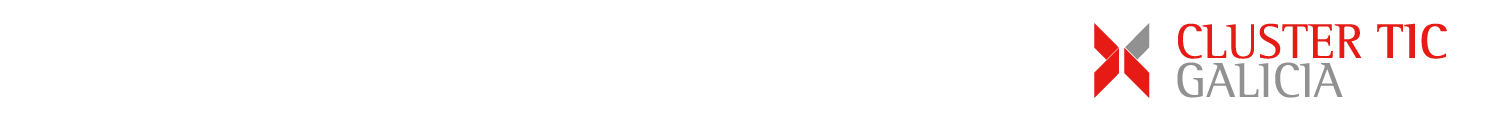
<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Excepciones</div>

Las **excepciones** son eventos que ocurren durante la ejecución de un programa que interrumpen el flujo normal de las instrucciones del mismo. Pueden producirse como resultado de un error en tiempo de ejecución, o podemos provocarlas en nuestro código de forma explícita con el objetivo de gestionar situaciones excepcionales.

En general, si no "capturamos" una excepción (si no la detectamos y gestionamos adecuadamente), nuestro programa terminará abruptamente, mostrándose un mensaje de error al usuario.

# Captura de excepciones
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

La captura de excepciones en Python se realiza mediante el uso de bloques **try** y **except**. Este mecanismo nos permite manejar errores que pueden ocurrir en nuestro programa, permitiéndonos responder a ellos o recuperar la ejecución de manera controlada. Veamos cómo funciona.

Para comenzar, provoquemos una excepción intentando dividir un número por cero (lo que genera un error):

In [1]:
a = 10
b = 0
c = a / b

ZeroDivisionError: division by zero

Comprobamos en el código anterior que se ha generado una excepción de tipo *ZeroDivisionError*. En condiciones normales, esto supondría la terminación del programa. La estructura básica del bloque que nos permite captura una excepción y gestionarla apropiadamente es la siguiente:

In [2]:
try:
    pass                # Código que podría generar una excepción
except:
    pass                # Código que se ejecuta si se captura una excepción

* El código que se incluya dentro del bloque *try* (código que deberá estar tabulado adecuadamente) será el código que puede provocar la excepción y que queremos "proteger".
* El código que se incluya dentro del bloque *except* (que también deberá estar tabulado) será el que capture y maneje la excepción en caso de que ocurra

Apliquemos este código a la división por cero:

In [3]:
a = 10
b = 0
try:
    c = a / b
except:
    print("Se ha producido un error")

Se ha producido un error


Comprobamos que, en este caso, se ha detectado el error y nuestro código (el contenido en el bloque *except*) lo ha gestionado de alguna forma (en este ejemplo, simplemente informando al usuario) y no se ha producido un error de ejecución que suponga la terminación de nuestro programa.

Si la variable *c* que hemos usado deber recibir un valor tras el intento de división, podríamos modificar nuestro código para que, en caso de que se produzca una excepción, se le asigne un valor por defecto:

In [4]:
a = 10
b = 0
try:
    c = a / b
except:
    c = None
    print("Se ha producido un error")

Se ha producido un error


Ahora, se informa al usuario pero también se ha asignado el valor *None* a dicha variable.

# Captura de excepciones por tipo
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

En Python, las excepciones están organizadas en una jerarquía de clases, lo que permite una gestión detallada de cada tipo de error. Así, por ejemplo, podríamos modificar el código anterior para que solo capture las excepciones de tipo "divición por cero":

In [5]:
a = 10
b = 0
try:
    c = a / b
except ZeroDivisionError:
    c = None
    print("ZeroDivisionError")

ZeroDivisionError


En este caso, por supuesto, si se produjese algún otro tipo de excepción, el programa devolvería un error y se terminaría su ejecución.

# Captura de múltiples excepciones
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

En un caso como el anterior, podemos capturar la excepción "división por cero" por un lado, y el resto de excepciones por otro:

In [6]:
a = 10
b = 0
try:
    c = a / b
except ZeroDivisionError:
    print("División por cero")
except:
    print("Se ha producido un error")

División por cero


Con esta estructura, en el caso de que se produzca una excepción, se comprobará en primer lugar si su tipo es "ZeroDivisionError". Si lo es, se ejecutará el código correspondiente en dicho bloque (y se terminará la ejecución de la celda). Si no lo es, se ejecutará el último *except* que captura todas las excepciones que hayan llegado hasta él.

Veamos cómo se comportaría este código en el caso de que se produjese otro tipo de excepción. Por ejemplo, hagamos referencia a una variable "B" que no existe (lo que provoca una excepción tipo *NameError*):

In [7]:
a = 10
b = 0
try:
    c = a / B
except ZeroDivisionError:
    print("División por cero")
except:
    print("Se ha producido un error")

Se ha producido un error


Comprobamos que dicha excepción ha sido captura para el bloque *except* situado al final del código. Por supuesto, podemos capturar cada tipo de excepción que deseemos por separado:

In [8]:
a = 10
b = 0
try:
    c = a / B
except ZeroDivisionError:
    print("División por cero")
except NameError:
    print("Variable inexistente")
except:
    print("Se ha producido un error")

Variable inexistente


Si se añade un bloque "*except:*" (sin especificar el tipo de la excepción), éste deberá ir situado siempre al final.

# Principales excepciones
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Veamos las excepciones con las que más frecuentemente podemos encontrarnos:

### NameError

Ya comentada: se genera cuando se intenta acceder a una variable (o a una función) que no ha sido definida:

In [9]:
a / B

NameError: name 'B' is not defined

La captura de esta excepción específico se realizaría con el siguiente código:

In [10]:
try:
    c = a / B
except NameError:
    print("NameError")

NameError


### ZeroDivisionError

También vista ya: Se produce cuando se intenta dividir un número por cero.

In [11]:
1 / 0

ZeroDivisionError: division by zero

In [12]:
try:
    c = 1 / 0
except ZeroDivisionError:
    print("ZeroDivisionError")

ZeroDivisionError


### TypeError

Se genera cuando se realiza una operación con un tipo de objeto inadecuado:

In [13]:
c = "1" + 2

TypeError: can only concatenate str (not "int") to str

In [14]:
try:
    c = "1" + 2
except TypeError:
    print("TypeError")

TypeError


### ValueError

Se produce cuando una función recibe un argumento con el tipo correcto pero un valor inapropiado. Por ejemplo, la función *int* puede recibir un texto como argumento, pero siempre que el texto represente un número:

In [15]:
int("17")

17

Cuando no es así, se produce una excepción de tipo *ValueError*:

In [16]:
int("python")

ValueError: invalid literal for int() with base 10: 'python'

In [17]:
try:
    c = int("python")
except ValueError:
    print("ValueError")

ValueError


### IndexError

Ocurre cuando se intenta acceder a un índice fuera del rango de una secuencia (como una lista o una tupla).

In [18]:
lista = [2, 4, 6]
c = lista[8]

IndexError: list index out of range

In [19]:
lista = [2, 4, 6]
try:
    c = lista[8]
except IndexError:
    print("IndexError")

IndexError


### KeyError

Se genera cuando se intenta acceder a un diccionario con una clave que no existe.

In [20]:
diccionario = {"a": 1, "b": 2}
diccionario["c"]

KeyError: 'c'

In [21]:
diccionario = {"a": 1, "b": 2}
try:
    c = diccionario["c"]
except KeyError:
    print("KeyError")

KeyError


### AttributeError

Ocurre cuando se hace referencia a un atributo o método que no existe en un objeto.

In [22]:
"python".mayusculas()

AttributeError: 'str' object has no attribute 'mayusculas'

In [23]:
try:
    "python".mayusculas()
except AttributeError:
    print("AttributeError")

AttributeError


# Generación explícita de excepciones
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

También podemos generar una excepción de forma explícita usando la secuencia **raise**:

In [24]:
def dividir(a, b):
    if b == 0:
        raise ValueError("El divisor no puede ser cero")
    return a / b

En este código, comprobamos si el denominador es cero y, si lo es, generamos una excepción:

In [25]:
dividir(1, 0)

ValueError: El divisor no puede ser cero

La principal utilidad de esto es el forzar la validación de una condición: Si sabemos que ciertas condiciones pueden causar problemas más adelante en nuestro código, podemos comprobarlas anticipadamente y generar una excepción si no se cumplen. Una vez generada la excepción, podríamos capturarla para gestionarla adecuadamente:

In [26]:
try:
    resultado = dividir(1, 0)
except ValueError:
    print("Error")

Error


Podemos modificar el código anterior para que capture también el mensaje devuelto por la excepción (el mensaje "*El divisor no puede ser cero*") y lo muestre en pantalla, por ejemplo:

In [27]:
try:
    resultado = dividir(1, 0)
except ValueError as error:
    print(error)

El divisor no puede ser cero


El uso de "*as error*" en la cláusula *except* sirve para capturar la instancia de la excepción generada y asignarla a una variable (en este caso, "error", pero podría asignarse a otra variable con otro nombre cualquiera). Esta variable proporciona acceso a la información asociada a la excepción, lo que permite que nuestro código responda de manera correcta al error.

# Uso de "else" y "finally"
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Además de los bloques vistos (*try* y *except*) podemos añadir otros bloques a nuestro código.

### else

Este bloque se ejecuta si no ocurre ninguna excepción en el bloque *try*:

In [28]:
a = 10
b = 3
try:
    c = a / b
except:
    print("Se ha producido un error")
else:
    print("El valor obtenido es", c)

El valor obtenido es 3.3333333333333335


### finally

Este bloque se ejecuta siempre después de los bloques try y except, ocurra o no una excepción. Es útil para tareas de limpieza, o cierre de archivos o de bases de datos abiertas que deben realizarse independientemente de si se produjo o no un error:

In [29]:
try:
    print("Intentando abrir el archivo...")
    archivo = open('archivo_inexistente.txt', 'r')
except FileNotFoundError:
    print("El archivo no se encontró")
else:
    print("El archivo se abrió correctamente")
    archivo.close()
finally:
    print("Finalizando operación de apertura de archivo")

Intentando abrir el archivo...
El archivo no se encontró
Finalizando operación de apertura de archivo


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>